In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline


In [28]:
df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [29]:
#ganti euro ke rupiah
df['charges']= df['charges']*16000
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,169608772.8
1334,18,female,31.92,0,no,northeast,35295692.8
1335,18,female,36.85,0,no,southeast,26077336.0
1336,21,female,25.80,0,no,southwest,32127120.0
1337,61,female,29.07,0,yes,northwest,466261764.8


In [30]:
#Mencari Missing Value dari data
df.isnull().sum()
#Tidak terdapat missing value!

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [31]:
age = df["age"]

In [32]:
print(df.isnull().values.any())

False


<AxesSubplot:>

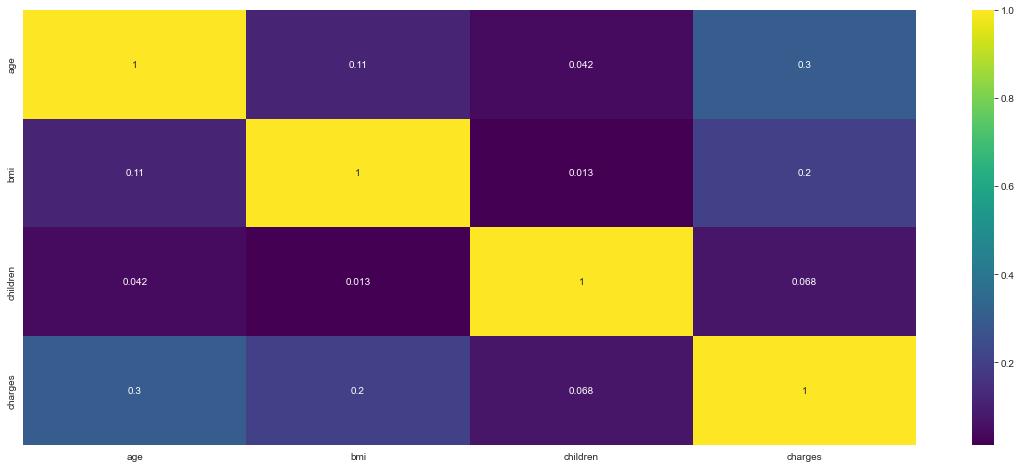

In [33]:
#DATA VISUALISASI
sns.set({'figure.figsize': [20,8]})
sns.heatmap(df.corr(), cmap= 'viridis', annot=True)

In [60]:
korelasi = df.corr(method='pearson')

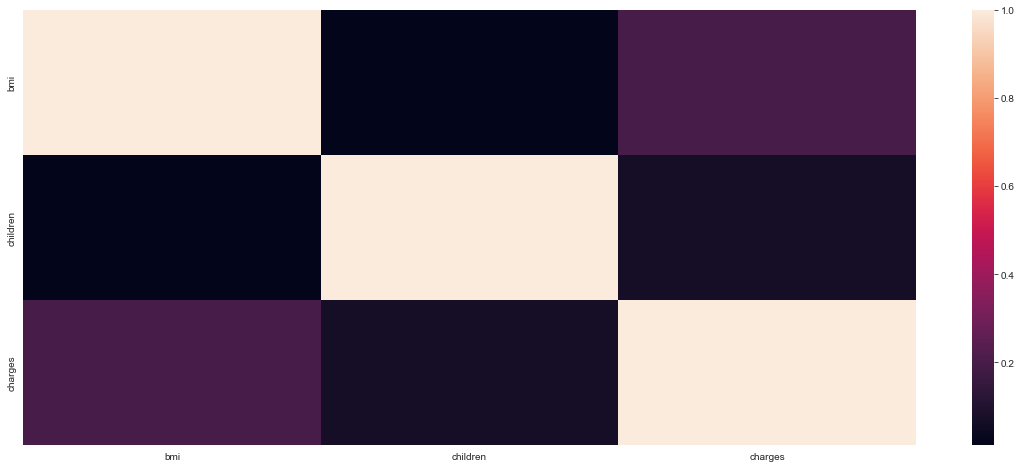

In [62]:
sns.heatmap(korelasi)
plt.show()

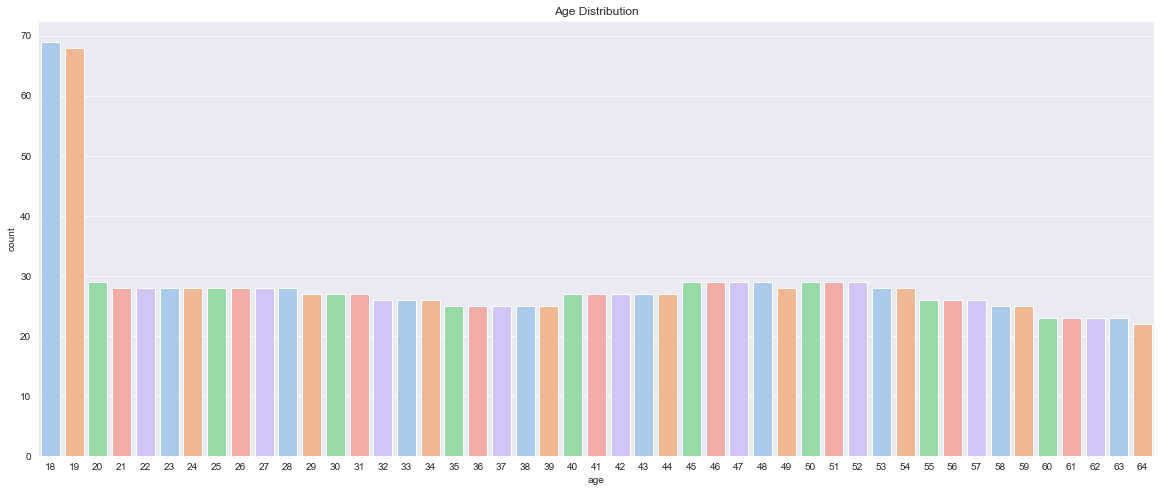

In [34]:
#Box Plot

#Define Seaborn color palette
colors = sns.color_palette('pastel')[0:5]

#Define the vix function
sns.countplot(x='age', data=df, palette=colors)

#define titile
plt.title('Age Distribution')
plt.show()

<AxesSubplot:xlabel='age', ylabel='charges'>

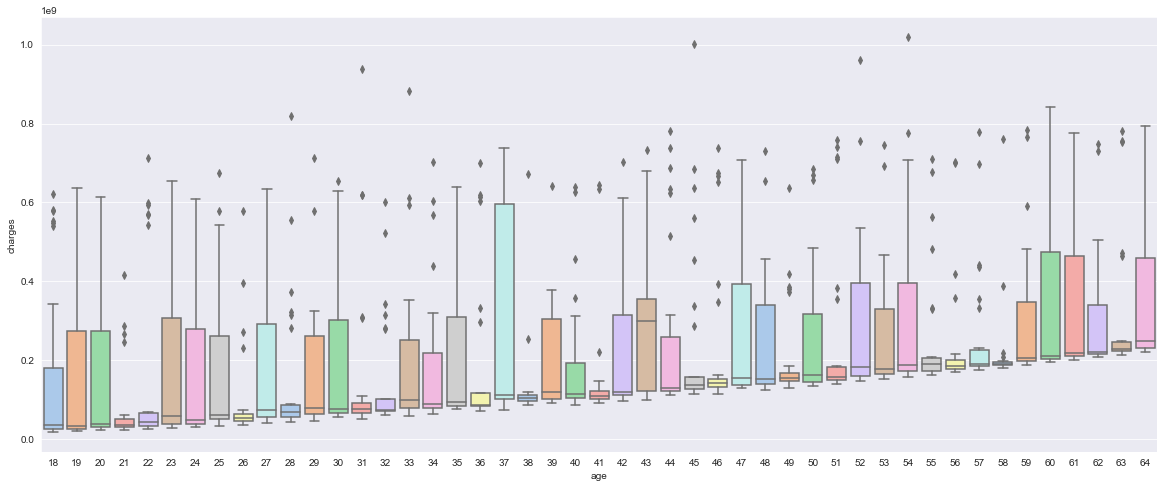

In [35]:
# Box plot data vertical

colors = sns.color_palette('pastel')
sns.boxplot(x="age", y="charges", data=df,palette=colors)

D:\Anaconda\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disabl

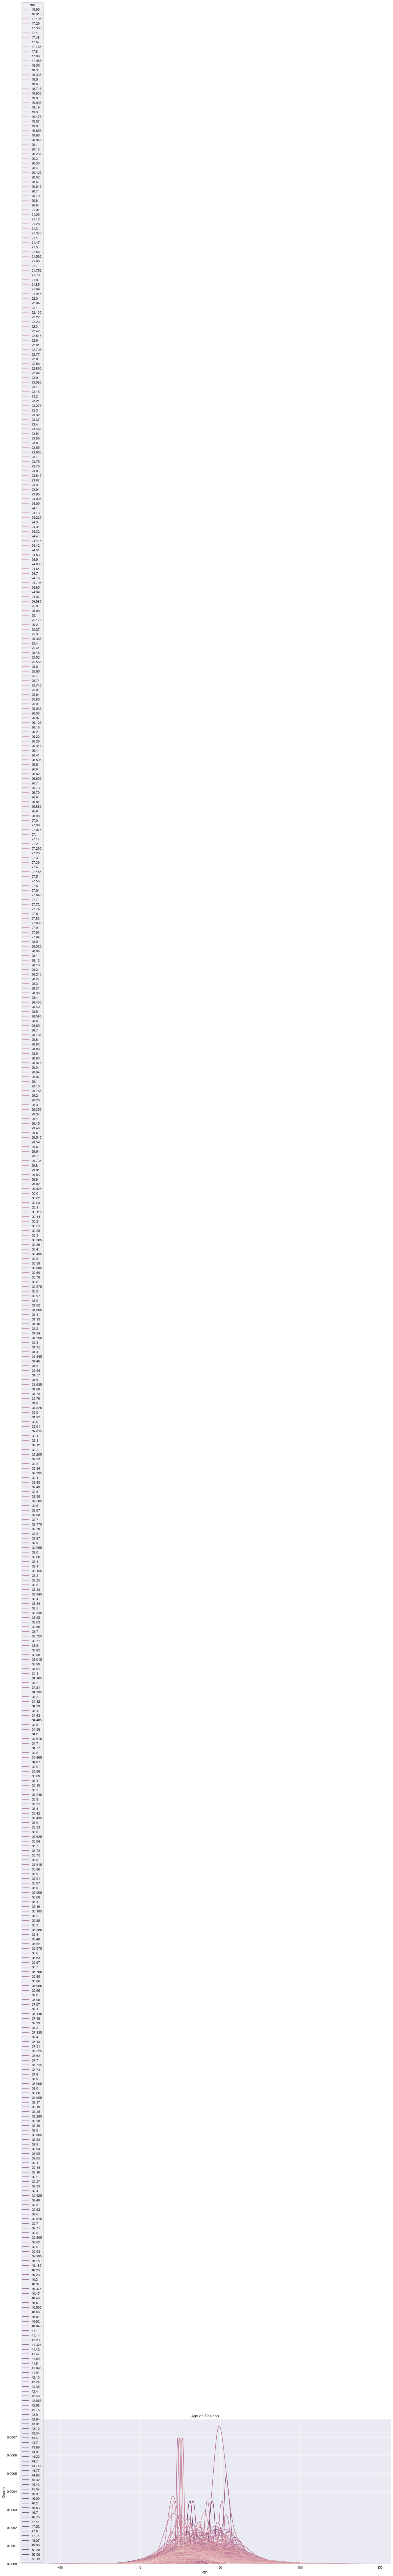

In [36]:
#Line KDE Plot

sns.kdeplot(x='age', hue='bmi', data=df)
plt.title('Age on Position')
plt.show()

In [37]:
bmi = df["bmi"]
df = df[["bmi","children","charges"]]
children = df['children']
charges = ['charges']
age = df['age']

KeyError: 'age'

In [38]:
#NORMALISASI MENGGUNAKAN STANDARD SCALER
print(df)

         bmi  children       charges
0     27.900         0  2.701588e+08
1     33.770         1  2.760884e+07
2     33.000         3  7.119139e+07
3     22.705         0  3.517515e+08
4     28.880         0  6.186968e+07
...      ...       ...           ...
1333  30.970         3  1.696088e+08
1334  31.920         0  3.529569e+07
1335  36.850         0  2.607734e+07
1336  25.800         0  3.212712e+07
1337  29.070         0  4.662618e+08

[1338 rows x 3 columns]


In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler_data = scaler.fit_transform(df)
print(scaler_data)

[[-0.45332    -0.90861367  0.2985838 ]
 [ 0.5096211  -0.07876719 -0.95368917]
 [ 0.38330685  1.58092576 -0.72867467]
 ...
 [ 1.0148781  -0.90861367 -0.96159623]
 [-0.79781341 -0.90861367 -0.93036151]
 [-0.26138796 -0.90861367  1.31105347]]


In [59]:
total = df['charges']
avg = df['charges']
dataa = df[['charges', 'bmi', 'children']]
print(df)

         bmi  children       charges
0     27.900         0  2.701588e+08
1     33.770         1  2.760884e+07
2     33.000         3  7.119139e+07
3     22.705         0  3.517515e+08
4     28.880         0  6.186968e+07
...      ...       ...           ...
1333  30.970         3  1.696088e+08
1334  31.920         0  3.529569e+07
1335  36.850         0  2.607734e+07
1336  25.800         0  3.212712e+07
1337  29.070         0  4.662618e+08

[1338 rows x 3 columns]


In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(df)

In [56]:
normal = pd.DataFrame(data,columns=df.columns)
print(normal)

           bmi  children   charges
0     0.321227       0.0  0.251611
1     0.479150       0.2  0.009636
2     0.458434       0.6  0.053115
3     0.181464       0.0  0.333010
4     0.347592       0.0  0.043816
...        ...       ...       ...
1333  0.403820       0.6  0.151299
1334  0.429379       0.0  0.017305
1335  0.562012       0.0  0.008108
1336  0.264730       0.0  0.014144
1337  0.352704       0.0  0.447249

[1338 rows x 3 columns]


In [53]:
#CLASSIFICATION
from sklearn.model_selection import train_test_split

In [42]:
X_train,X_test, y_train, y_test = train_test_split(scaler_data,df['children'], test_size=0.2)


In [43]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

In [45]:
LoanTree = DecisionTreeClassifier(criterion = "entropy", max_depth=4)
LoanTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [46]:
LoanTree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [47]:
predTree = LoanTree.predict(X_test)

In [48]:
from sklearn import metrics
print("Decision Trees's Accuracy: ",metrics.accuracy_score(y_test,predTree))

Decision Trees's Accuracy:  0.9925373134328358


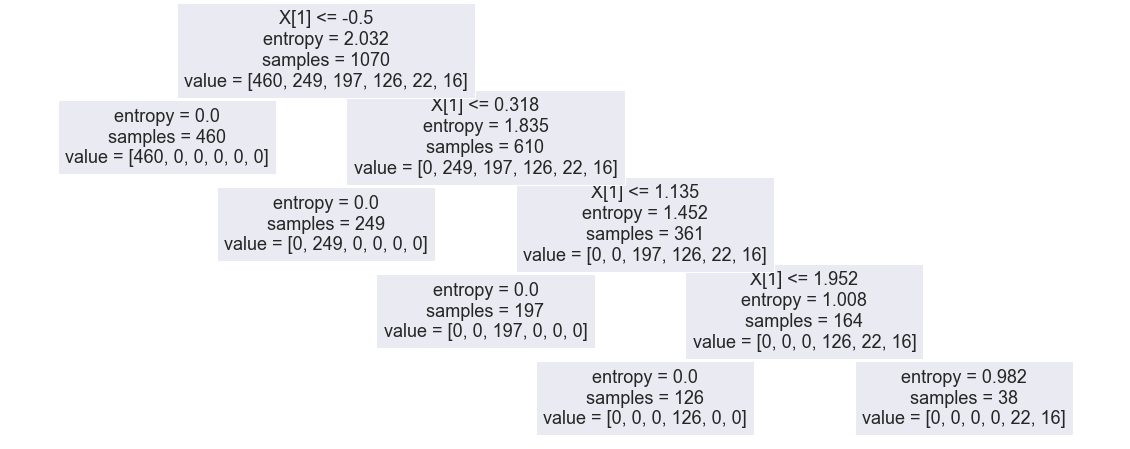

In [49]:
tree.plot_tree(LoanTree)
plt.show()

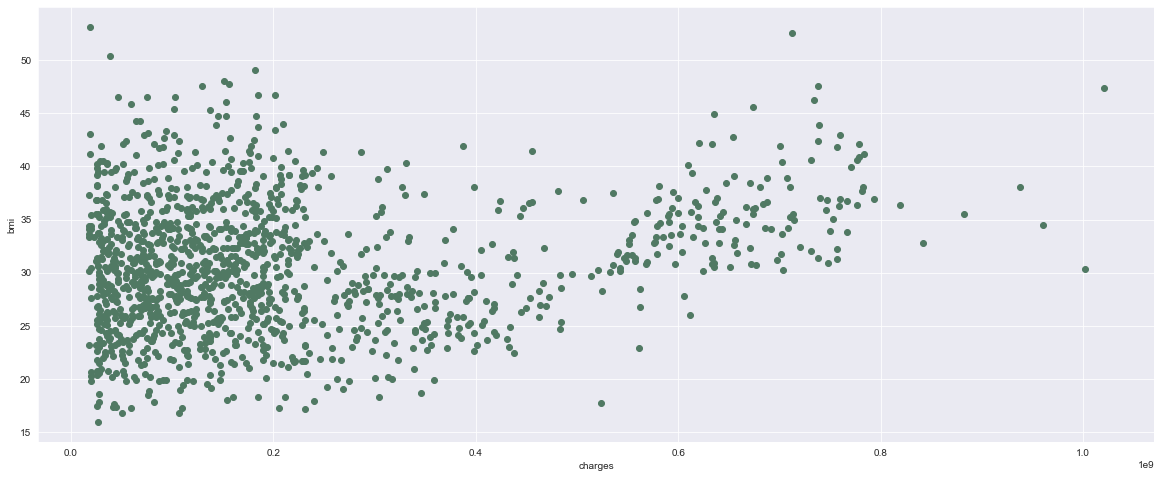

In [50]:
#REGRESI
plt.scatter(df.charges, df.bmi, color='#507963')
plt.xlabel("charges")
plt.ylabel("bmi")
plt.show()

In [66]:
#EVALUASI
from sklearn.linear_model import LinearRegression
model = LinearRegression()


A, b = df[['bmi','charges']],df.bmi
model.fit(A, b)
r_squared = model.score(A, b)
print(r_squared)

1.0


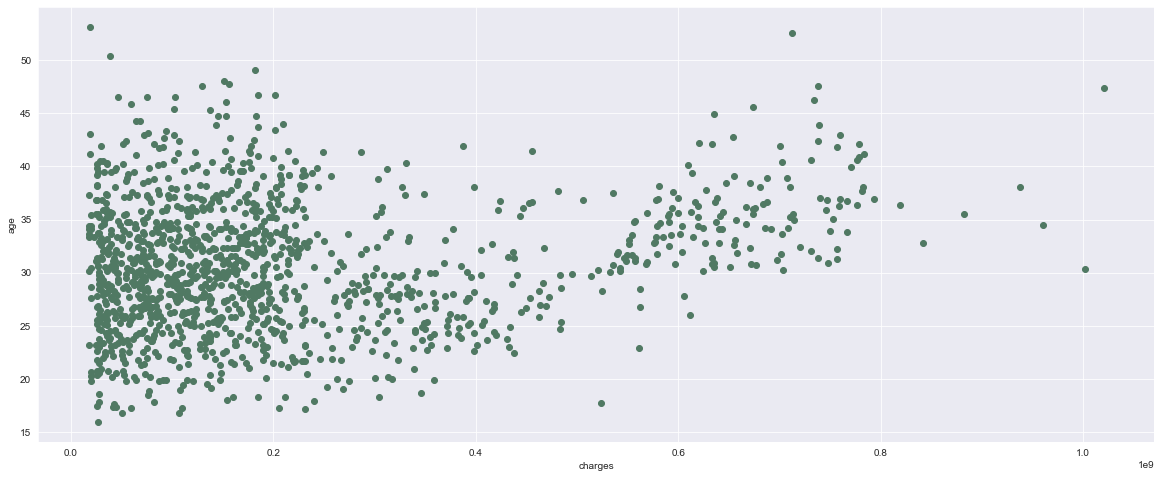

In [64]:
#REGRESI
plt.scatter(df.charges, df.bmi, color='#507963')
plt.xlabel("charges")
plt.ylabel("age")
plt.show()